In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [25]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [3]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [4]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

## Trasformazione delle colonne in tipi

In [26]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

users['id'] = pd.to_numeric(users['id'], errors='coerce')
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

In [6]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

## User analysis 

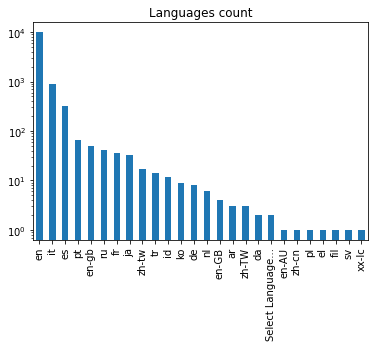

In [7]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

#### Lang Analysis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
0,4.912745e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c...",Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
1,4.886930e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
2,4.854109e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
3,1.683542e+15,2.955215e+07,0.0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
4,7.055459e+09,2.955215e+07,NaN,0.0,NaN,0.0,0.0,0.0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


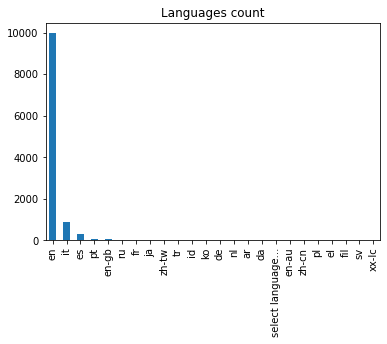

In [8]:
users['lang'] = users['lang'].str.lower()
users['lang'].value_counts().plot(kind='bar', title='Languages count')

users.rename(columns={
    'id' : 'user_id',
    'created_at' : 'subscribing_date'
}, inplace=True)
nal = users[(users['lang'] == 'select language...') | (users['lang'] == 'xx-lc')]

text_nal = tweets.merge(nal, on='user_id')
text_nal

In [9]:
text_nal[text_nal['name'] == 'Leanne Arker']

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
2484,5.866970e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-12 01:07:12,@bernardchickey I've heard of something called...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2485,5.601363e+17,2.956614e+09,13933.0,0.0,0.0,0.0,0.0,2.0,2020-01-29 18:04:45,RT @stephenfry: If physical diseases were trea...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2486,5.751565e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-11 04:49:27,@Hilary_Barry Gives new meaning to the term sl...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2487,NaN,2.956614e+09,9.0,0.0,0.0,NaN,NaN,NaN,2020-03-26 19:04:58,NaN,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2488,5.925147e+17,2.956614e+09,253.0,0.0,0.0,1.0,0.0,1.0,2020-04-28 02:24:59,RT @philipreeve: Help. If you c medal tweet me...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


Visti i tweet tutti so inglesi

In [10]:
users['lang'].replace('select language...', 'en', inplace=True)
users['lang'].replace('xx-lc', 'en', inplace=True)

### Bot Analysis

Check if there are only 0 and 1 values

In [11]:
users.bot.unique()

array([1, 0])

### Statues Count analysis

Calculate for each user how much tweets we have in tweets.csv

In [12]:

count = tweets.groupby('user_id', as_index=False)['user_id'].count()

#cnt['count'] = tweets.groupby(by='user_id', as_index=False, dropna=False)['user_id'].count()
c = users
c.sort_values('user_id')
c['count'] = count
c['statuses_count'].sum() - c['count'].sum()

#max = tweets.groupby('user_id', as_index=False).count()
#max['max'] = max.max(axis=0)
#max

53176053.0

In [13]:
c['count'].median()

152.0

### User's created at analysis (previously we changed the name of the attribute in 'subscribing_date')

In [14]:
users[users['subscribing_date'] > datetime.now()]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


In [15]:
users[users['subscribing_date'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


Non cene di timestamp sbagliati in italia

### Resulting Plots

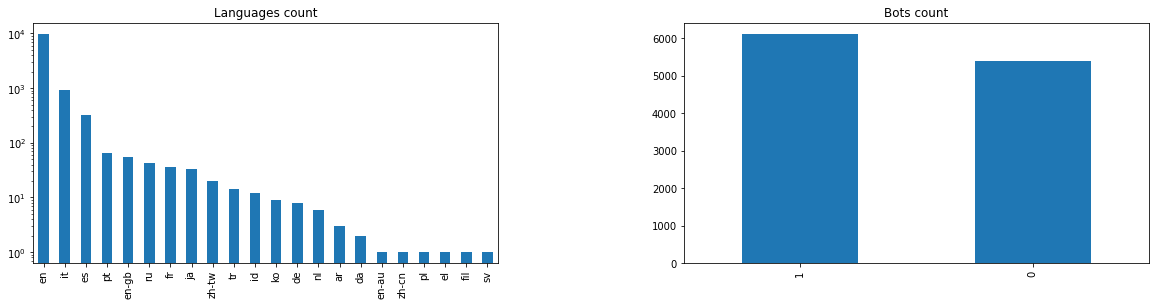

In [16]:
fig = plt.figure(figsize=(20,23))
fig_dims = (4,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')

###fig 2
plt.subplot2grid(fig_dims, (0,1))
users['bot'].value_counts().plot(kind='bar', title='Bots count')

plt.show()

## Tweets Analysis

### Replace NaN values in 'id'

In [51]:
tweets['id'].replace(math.inf, math.nan, inplace=True)

counter = int(tweets['id'].max()) + 1

nan_id = tweets[tweets['id'].isna()].sort_values('created_at')

print(nan_id.duplicated().count())
nan_id['id'] = np.arange(counter, counter + len(nan_id))
print(nan_id.duplicated().count())
nan_id

376152
376152


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,...,infer_urls_x,retweet_median,reply_median,favorite_median,hashtags_median,urls_median,mentions_median,infer_hashtags_y,infer_mentions_y,infer_urls_y
10971810,999997394713095937,14982885.0,0.0,0.0,0.0,0.0,0.0,1.0,2014-01-05 04:44:08,@21stcenturydad Cheers for Muse. Was just pla...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10973030,999997394713095938,14982885.0,0.0,0.0,0.0,0.0,0.0,1.0,2014-01-05 04:49:49,@21stcenturydad Since you discovered Drea... (...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10971735,999997394713095939,14982885.0,0.0,0.0,0.0,0.0,1.0,1.0,2014-01-17 00:59:53,@masakiryota Oh yeah they have! I wish I'd be...,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5041592,999997394713095940,19300510.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-01-23 20:10:29,@davidm_en how is it going with your english/f...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11635072,999997394713095941,18313402.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-01-24 16:20:25,"work work, work..",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299129,999997394713472084,474784082.0,1.0,0.0,0.0,1.0,0.0,2.0,2020-05-03 09:51:21,@GioneeIndia My Fav. Colour is Purple &amp; go...,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0
2298585,999997394713472085,474784082.0,4.0,0.0,0.0,1.0,0.0,7.0,2020-05-03 09:58:08,RT @Mohit_k_ag: @GioneeIndia @rachit_g2 @White...,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0
2299312,999997394713472086,474784082.0,53.0,0.0,0.0,1.0,0.0,2.0,2020-05-03 10:07:38,NaN,...,NaN,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0
2296709,999997394713472087,474784082.0,43.0,0.0,0.0,0.0,0.0,1.0,2020-05-03 10:13:28,"RT @IPL: KKR XI: R Uthappa, G Gambhir, M Pande...",...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0


### Infer num_hashtags, num_urls and num_mentions

In [27]:
tweets['infer_hashtags'] = tweets.text.str.count('#')
tweets['infer_mentions'] = tweets.text.str.count('@')
tweets['infer_urls'] = tweets.text.str.count('http://')

print("num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_mentions'].isna().sum()))

tweets['num_hashtags'] = tweets['num_hashtags'].fillna(tweets['infer_hashtags'])
tweets['num_mentions'] = tweets['num_mentions'].fillna(tweets['infer_mentions'])
tweets['num_urls'] = tweets['num_urls'].fillna(tweets['infer_urls'])

print("num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_mentions'].isna().sum()))


num_hashtags nan: 1163677 num_mentions nan: 987990 num_urls nan: 987990
num_hashtags nan: 489185 num_mentions nan: 488515 num_urls nan: 488515


### Replace NaN values in tweets

In [28]:
t = tweets
user_median = t.groupby('user_id', as_index=False).median()
user_median.rename(columns={
    'retweet_count' : 'retweet_median',
    'reply_count' : 'reply_median',
    'favorite_count' : 'favorite_median',
    'num_hashtags' : 'hashtags_median',
    'num_urls' : 'urls_median',
    'num_mentions' : 'mentions_median'
}, inplace=True)
user_median.drop(columns=['id'], inplace=True)
tweets = t.merge(user_median, on='user_id')

print(" retweet_count nan: " + str(tweets['retweet_count'].isna().sum()) + \
      " reply_count nan: " + str(tweets['reply_count'].isna().sum()) + \
      " favorite_count nan: " + str(tweets['favorite_count'].isna().sum()) + \
      " num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_urls'].isna().sum()))

#sostituzione valori
tweets['retweet_count'] = tweets['retweet_count'].fillna(tweets['retweet_median'])
tweets['reply_count'] = tweets['reply_count'].fillna(tweets['reply_median'])
tweets['favorite_count'] = tweets['favorite_count'].fillna(tweets['favorite_median'])
tweets['num_hashtags'] = tweets['num_hashtags'].fillna(tweets['hashtags_median'])
tweets['num_mentions'] = tweets['num_mentions'].fillna(tweets['mentions_median'])
tweets['num_urls'] = tweets['num_urls'].fillna(tweets['urls_median'])

#drop colonne con mediana

print(" retweet_count nan: " + str(tweets['retweet_count'].isna().sum()) + \
      " reply_count nan: " + str(tweets['reply_count'].isna().sum()) + \
      " favorite_count nan: " + str(tweets['favorite_count'].isna().sum()) + \
      " num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_urls'].isna().sum()))


 retweet_count nan: 518684 reply_count nan: 654509 favorite_count nan: 653433 num_hashtags nan: 377025 num_mentions nan: 376489 num_urls nan: 244866
 retweet_count nan: 158 reply_count nan: 257 favorite_count nan: 247 num_hashtags nan: 170 num_mentions nan: 170 num_urls nan: 88


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,retweet_median,reply_median,favorite_median
0,5.093540e+17,327746321.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang...",0.0,0.0,0.0
1,5.238919e+17,327746321.0,0.0,0.0,0.0,0.0,1.0,0.0,2019-10-21 17:42:10,Read the Biography of Don Henley http://t.co/...,0.0,0.0,0.0
2,5.282026e+17,327746321.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-02 15:11:22,Don't tell me where your priorities are. Show ...,0.0,0.0,0.0
3,5.301192e+17,327746321.0,0.0,0.0,0.0,0.0,1.0,0.0,2019-11-07 22:07:20,Learn About the Great Music of Bill Justis ht...,0.0,0.0,0.0
4,5.204351e+17,327746321.0,0.0,0.0,0.0,0.0,1.0,0.0,2019-10-12 04:46:17,Do you love James Bond? Â Check out these cool...,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13230796,1.419030e+16,932.0,0.0,0.0,0.0,NaN,NaN,NaN,2019-09-13 01:09:50,NaN,0.0,0.0,0.0
13230797,2.771328e+17,334249560.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-12-09 19:29:36,@maricar85 yo toy currando :-( si te sirve d ...,0.0,0.0,0.0
13230798,3.094874e+08,5551.0,0.0,NaN,NaN,NaN,0.0,NaN,2019-10-27 12:50:15,NaN,0.0,NaN,NaN
13230799,4.888923e+15,8994.0,198.0,0.0,NaN,0.0,1.0,2.0,2020-04-23 04:34:03,"RT @annecurtissmith: And of course, Thank you ...",198.0,0.0,NaN
